# Petrophysical  Interpretation `DLIS`

In [1]:
import pandas as pd
import numpy as np
import dlisio
dlisio.set_encodings(['latin1'])
import script as sc

# Ensure that we can see pandas tables of up to 500 rows
pd.set_option('display.max_rows', 1000)

In [2]:
file = r"F:/PetroleumData/15_9-F-10/WLC_PETRO_COMPUTED_OUTPUT_1.DLIS"

In [3]:
f, *f_tail = dlisio.load(file)
origin, *origin_tail = f.origins

In [4]:
f.describe()

------------
Logical File
------------
Description : logicalfile(CPI_OUTPUT.logdata)
Frames      : 1
Channels    : 10

Known objects
--
FILE-HEADER : 1
ORIGIN      : 1
PARAMETER   : 12
CHANNEL     : 10
FRAME       : 1


In [5]:
origin.describe()

------
Origin
------
name   : 0
origin : 0
copy   : 0

Logical file ID          : CPI_OUTPUT.logdata
File set name and number : PETROLOG-TO-DLIS / 308231456
File number and type     : 1 / PETROLOG-FILE

Field                   : VOLVE
Well (id/name)          :  / 15/9-F-10
Produced by (code/name) : 126 / CROCKER DATA PROCESSING
Produced for            : STATOILHYDRO ASA
Created                 : 2009-10-09 11:50:56.666000

Created by              : PETROLOG, (version: Version 10.5)
Other programs/services : PETROLOG-TO-DLIS


In [6]:
parameter_table = sc.summarize(f.parameters, name='Name', long_name='Long name', values='Value(s)')
parameter_table

,Name,Long name,Value(s)
0,CN,Company,[STATOILHYDRO ASA]
1,WN,Well Name,[15/9-F-10]
2,FN,Field,[VOLVE]
3,CTRY,Country,[NORWAY]
4,COUN,County or Rig name,[MAERSK INSPIRER]
5,LATI,Latitude,"[058 26' 29.807"" N DMS]"
6,LONG,Longitude,"[001 53' 14.929"" E DMS]"
7,PDAT,Perm. Datum,[MSL]
8,EDF,Elevation DF (wrt EPD),[54.900001525878906]
9,EGL,Elevation GL (wrt EPD),[-91.0]


In [7]:
for frame in f.frames:
    index_channel = next(ch for ch in frame.channels if ch.name == frame.index)
    print(f'Frame {frame.name}:')
    print(f'Description      : {frame.description}')
    print(f'Indexed by       : {frame.index_type}')
    print(f'Interval         : [{frame.index_min}, {frame.index_max}] {index_channel.units}')
    print(f'Direction        : {frame.direction}')
    print(f'Constant spacing : {frame.spacing} {index_channel.units}')
    print(f'Index channel    : {index_channel}')
    print(f'No. of channels  : {len(frame.channels)}')
    print()

Frame 0:
Description      : None
Indexed by       : BOREHOLE-DEPTH
Interval         : [None, None] 0.1 in
Direction        : None
Constant spacing : 60 0.1 in
Index channel    : Channel(DEPTH)
No. of channels  : 10



In [8]:
channel_table = sc.summarize(f.channels, name='Name', long_name='Long name', units='Units',dimension='Dimension', frame='Frame')
channel_table

,Name,Long name,Units,Dimension,Frame
0,DEPTH,,0.1 in,[1],Frame(0)
1,BVW,PHIF*SW,V/V,[1],Frame(0)
2,CARB_FLAG,Values changed using TEXT_EDIT,UNITLESS,[1],Frame(0)
3,COAL_FLAG,Coal flag,UNITLESS,[1],Frame(0)
4,KLOGH,10**(2+8*PHIF-9*VSH),MD,[1],Frame(0)
5,PHIF,Final porosity,V/V,[1],Frame(0)
6,RHOB,Bulk Density Bottom,G/C3,[1],Frame(0)
7,SAND_FLAG,Values changed using TEXT_EDIT,UNITLESS,[1],Frame(0)
8,SW,Values changed using TEXT_EDIT,V/V,[1],Frame(0)
9,VSH,LIMIT(VSH 0.015 0.85),V/V,[1],Frame(0)


In [9]:
file = r"F:/PetroleumData/15_9-F-10/WLC_PETRO_COMPUTED_OUTPUT_1.DLIS"

In [10]:
with dlisio.load(file) as file:
    for d in file:
        print(d.describe())
        for frame in d.frames:
            print(frame.describe())
            for channel in d.channels:
                print(channel.describe())

------------
Logical File
------------
Description : logicalfile(CPI_OUTPUT.logdata)
Frames      : 1
Channels    : 10

Known objects
--
FILE-HEADER : 1
ORIGIN      : 1
PARAMETER   : 12
CHANNEL     : 10
FRAME       : 1


-----
Frame
-----
name   : 0
origin : 0
copy   : 0

Channel indexing
--
Indexed by       : BOREHOLE-DEPTH
Index units      : 0.1 in
Constant spacing : 60 [0.1 in]
Index channel    : Channel(DEPTH)

Channels
--
DEPTH     BVW       CARB_FLAG COAL_FLAG KLOGH     PHIF      RHOB      SAND_FLAG
SW        VSH

-------
Channel
-------
name   : DEPTH
origin : 0
copy   : 255

Physical unit of sample   : 0.1 in
Sample dimensions         : 1
Maximum sample dimensions : 1
Property indicators       : 126-PRODUCER


-------
Channel
-------
name   : BVW
origin : 0
copy   : 255

Description : PHIF*SW

Physical unit of sample   : V/V
Sample dimensions         : 1
Maximum sample dimensions : 1
Property indicators       : 126-PRODUCER


-------
Channel
-------
name   : CARB_FLAG
origin : 0

In [11]:
file = r"F:/PetroleumData/15_9-F-10/WLC_PETRO_COMPUTED_OUTPUT_1.DLIS"

In [12]:
curves_L = []
curves_name = []
longs = []
unit = []
files_L = []
files_num = []
frames = []
frames_num = []
with dlisio.load(file) as file:
    for d in file:
        files_L.append(d)
        for fram in d.frames:
            frames.append(fram)
            for channel in d.channels:
                curves_name.append(channel.name)
                longs.append(channel.long_name)
                unit.append(channel.units)
                files_num.append(len(files_L))
                frames_num.append(len(frames))
                curves = channel.curves()
                curves_L.append(curves)

In [13]:
curve_index = pd.DataFrame(
{'Curve': curves_name,
'Long': longs,
'Unit': unit,
'Internal_File': files_num,
'Frame_Number': frames_num
})

In [14]:
curve_index

,Curve,Long,Unit,Internal_File,Frame_Number
0,DEPTH,,0.1 in,1,1
1,BVW,PHIF*SW,V/V,1,1
2,CARB_FLAG,Values changed using TEXT_EDIT,UNITLESS,1,1
3,COAL_FLAG,Coal flag,UNITLESS,1,1
4,KLOGH,10**(2+8*PHIF-9*VSH),MD,1,1
5,PHIF,Final porosity,V/V,1,1
6,RHOB,Bulk Density Bottom,G/C3,1,1
7,SAND_FLAG,Values changed using TEXT_EDIT,UNITLESS,1,1
8,SW,Values changed using TEXT_EDIT,V/V,1,1
9,VSH,LIMIT(VSH 0.015 0.85),V/V,1,1


In [15]:
curve_df = pd.DataFrame()
name_index = 0
for c in curves_L:
    name = curves_name[name_index]
    np.vstack(c)
    try:
        num_col = c.shape[1]
        col_name = [name] * num_col
        df = pd.DataFrame(data=c, columns=col_name)
        name_index = name_index + 1
        df = sc.df_column_uniquify(df)
        curve_df = pd.concat([curve_df, df], axis=1)
    except:
        num_col = 0
        df = pd.DataFrame(data=c, columns=[name])
        name_index = name_index + 1
        curve_df = pd.concat([curve_df, df], axis=1)
        continue

In [16]:
curve_df

,DEPTH,BVW,CARB_FLAG,COAL_FLAG,KLOGH,PHIF,RHOB,SAND_FLAG,SW,VSH
0,0,-999.25,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
1,60,-999.25,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
2,120,-999.25,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
3,180,-999.25,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
4,240,-999.25,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
...,...,...,...,...,...,...,...,...,...,...
35429,2125740,-999.25,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
35430,2125800,-999.25,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
35431,2125860,-999.25,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
35432,2125920,-999.25,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25


In [17]:
curve_df["Depth"] = curve_df["DEPTH"]*0.00254       #in -> mts
curve_df = curve_df.replace(-999.25,np.nan)

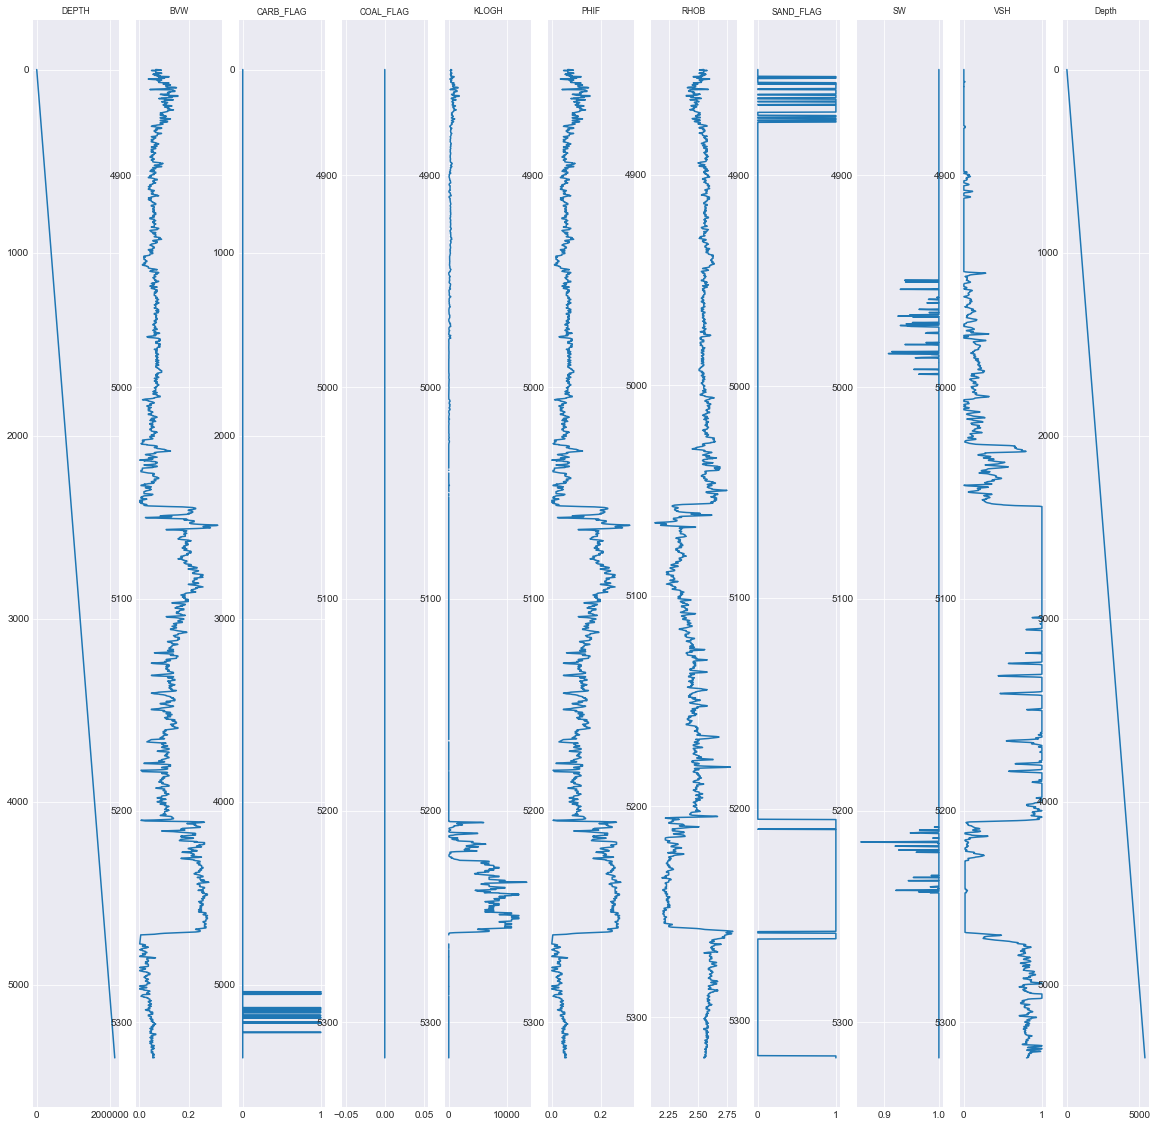

In [18]:
sc.well_plt(curve_df)

In [19]:
max(curve_df["Depth"])

5399.9892

In [21]:
del curve_df["DEPTH"]

In [24]:
curve_df = curve_df[['Depth','BVW', 'CARB_FLAG', 'COAL_FLAG', 'KLOGH', 'PHIF', 'RHOB', 'SAND_FLAG','SW', 'VSH']]

In [25]:
curve_df

,Depth,BVW,CARB_FLAG,COAL_FLAG,KLOGH,PHIF,RHOB,SAND_FLAG,SW,VSH
0,0.0000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1524,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3048,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.4572,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.6096,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
35429,5399.3796,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35430,5399.5320,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35431,5399.6844,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35432,5399.8368,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
curve_df.to_csv(r'C:\Users\Luis Navarro\Desktop\ProgrammingStuff\MachineLearning\Petroleum\F-10\petro_df.csv', index = False)